In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [6]:
# 1)Проанализировать выборку и провести ее предварительную обработку
df = pd.read_excel('reutersNLTK.xls')
df

,ids,categories,text
0,test/14826,['trade'],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...
1,test/14828,['grain'],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
2,test/14829,"['crude', 'nat-gas']",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...
4,test/14833,"['palm-oil', 'veg-oil']",INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...
...,...,...,...
10783,training/999,"['interest', 'money-fx']",U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...
10784,training/9992,['earn'],KNIGHT-RIDDER INC &lt;KRN> SETS QUARTERLY\n Q...
10785,training/9993,['earn'],TECHNITROL INC &lt;TNL> SETS QUARTERLY\n Qtly...
10786,training/9994,['earn'],NATIONWIDE CELLULAR SERVICE INC &lt;NCEL> 4TH ...


In [7]:
dff = df.copy(deep=True)
dff.categories = dff.categories.str.replace('[-]', '0')
vec_cl = CountVectorizer()
classes = vec_cl.fit_transform(dff.categories)
df_kl = pd.DataFrame({"Klass": np.array(vec_cl.get_feature_names()), 
                      'Kol':np.asarray(classes.sum(axis=0)).ravel()})
df_kl = (df_kl.sort_values(by=['Kol'], ascending=False))
df_kl.Klass = df_kl.Klass.str.replace('[0]', '-')
df_kl = df_kl.reset_index(drop=True)
df_kl

,Klass,Kol
0,earn,3964
1,acq,2369
2,money-fx,717
3,grain,582
4,crude,578
...,...,...
85,sun-meal,2
86,groundnut-oil,2
87,rye,2
88,lin-oil,2


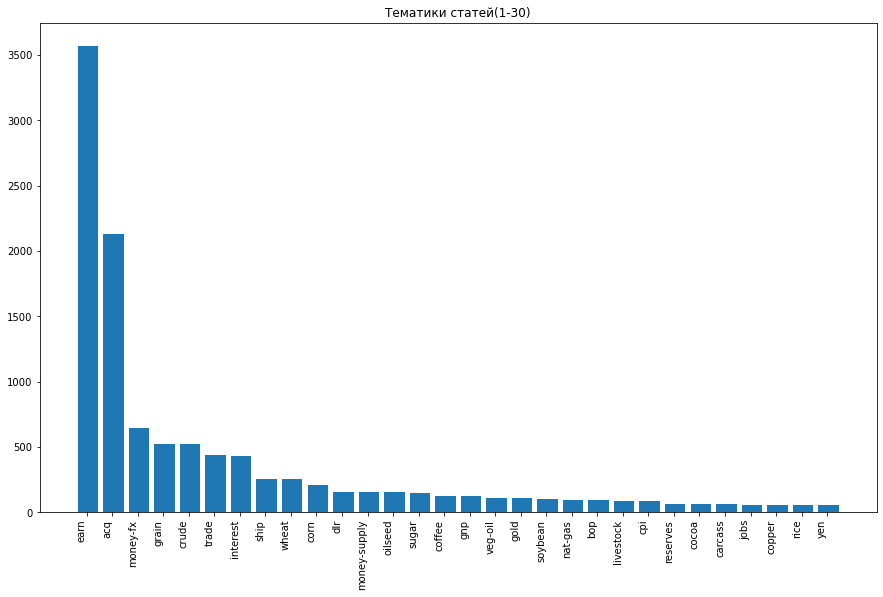

In [8]:
# a. построить гистограммы распределения по классам.
fig = plt.figure(figsize = (15, 10))
plt.title('Тематики статей(1-30)')
xs = range(len(df_kl.Klass[:30]))
plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in df_kl.Kol[:30]])
plt.xticks(xs, df_kl.Klass[:30])
fig.autofmt_xdate(rotation = 90)
fig.savefig('tem1.png')

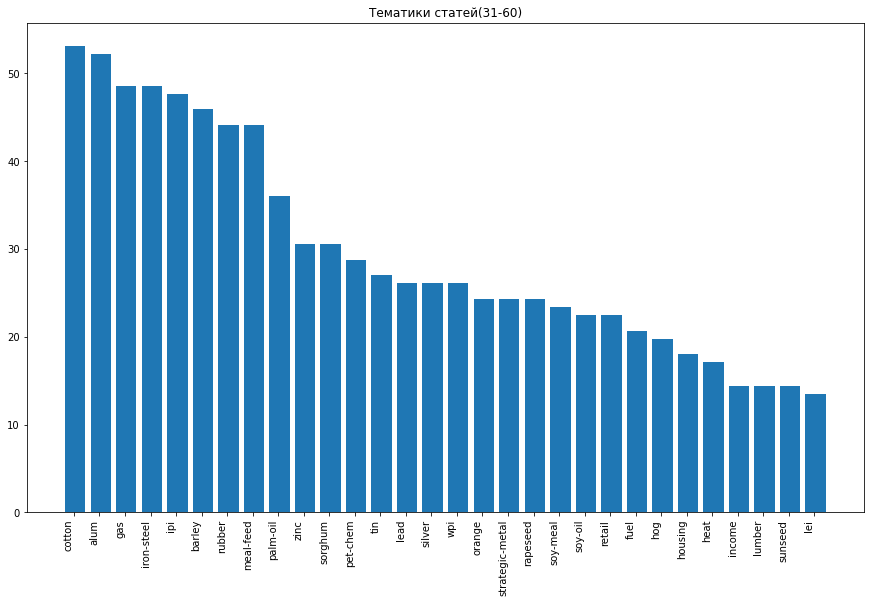

In [9]:
fig = plt.figure(figsize = (15, 10))
plt.title('Тематики статей(31-60)')
xs = range(len(df_kl.Klass[30:60]))
plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in df_kl.Kol[30:60]])
plt.xticks(xs, df_kl.Klass[30:60])
fig.autofmt_xdate(rotation = 90)
fig.savefig('tem2.png')

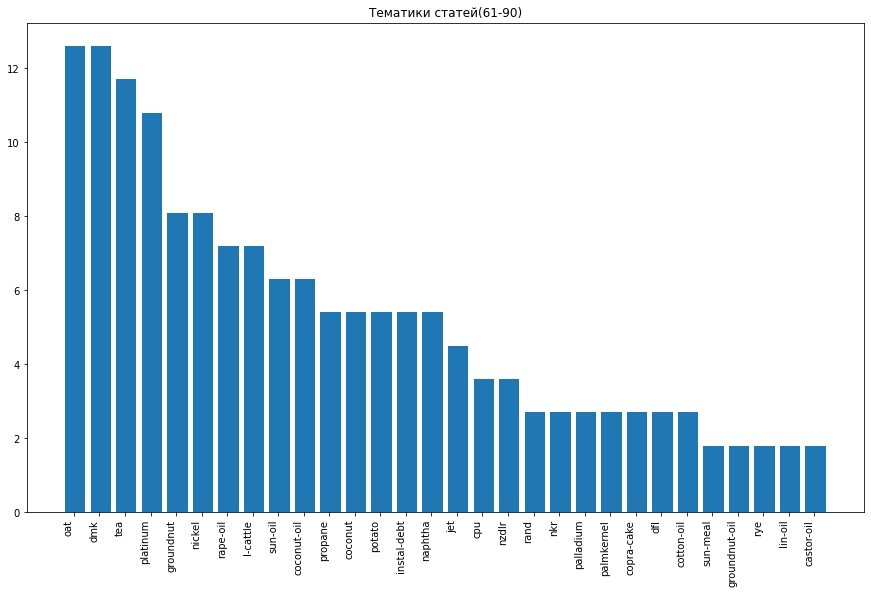

In [10]:
fig = plt.figure(figsize = (15, 10))
plt.title('Тематики статей(61-90)')
xs = range(len(df_kl.Klass[60:]))
plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in df_kl.Kol[60:]])
plt.xticks(xs, df_kl.Klass[60:])
fig.autofmt_xdate(rotation = 90)
fig.savefig('tem3.png')

In [11]:
df

,ids,categories,text
0,test/14826,['trade'],ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...
1,test/14828,['grain'],CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
2,test/14829,"['crude', 'nat-gas']",JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...",THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...
4,test/14833,"['palm-oil', 'veg-oil']",INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...
...,...,...,...
10783,training/999,"['interest', 'money-fx']",U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...
10784,training/9992,['earn'],KNIGHT-RIDDER INC &lt;KRN> SETS QUARTERLY\n Q...
10785,training/9993,['earn'],TECHNITROL INC &lt;TNL> SETS QUARTERLY\n Qtly...
10786,training/9994,['earn'],NATIONWIDE CELLULAR SERVICE INC &lt;NCEL> 4TH ...


In [12]:
# b.разбить выборку на отдельные слова и определить частоту встречаемости
# каждого слова в выборке. По результатам построить график зависимости слова 
# от частоты по убыванию частоты.
df.text = df.text.str.lower()
df.text = df.text.str.replace('[^a-z -]', '')
df.text = df.text.str.replace('[-]', ' ')
df

,ids,categories,text
0,test/14826,['trade'],asian exporters fear damage from us japan rift...
1,test/14828,['grain'],china daily says vermin eat pct grain stocks...
2,test/14829,"['crude', 'nat-gas']",japan to revise long term energy demand downwa...
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...",thai trade deficit widens in first quarter th...
4,test/14833,"['palm-oil', 'veg-oil']",indonesia sees cpo price rising sharply indon...
...,...,...,...
10783,training/999,"['interest', 'money-fx']",uk money market shortage forecast revised down...
10784,training/9992,['earn'],knight ridder inc ltkrn sets quarterly qtly d...
10785,training/9993,['earn'],technitrol inc lttnl sets quarterly qtly div ...
10786,training/9994,['earn'],nationwide cellular service inc ltncel th qtr ...


In [13]:
vec_text = CountVectorizer()
t = vec_text.fit_transform(df.text)
df_text = pd.DataFrame({"Word": np.array(vec_text.get_feature_names()), 
                        'Kol':np.asarray(t.sum(axis=0)).ravel()})
df_text = (df_text.sort_values(by=['Kol'], ascending=False))
df_text = df_text.reset_index(drop=True)
df_text

,Word,Kol
0,the,69255
1,of,36773
2,to,36326
3,in,29251
4,and,25628
...,...,...
32718,ltgvmi,1
32719,ltgvmfo,1
32720,ltgv,1
32721,ltgusl,1


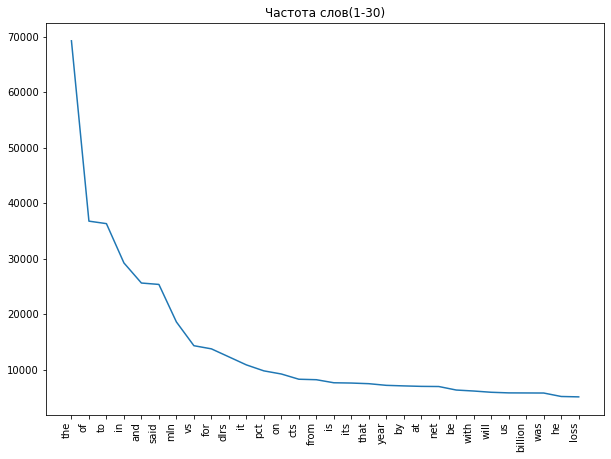

In [14]:
# Графики для 90 наиболее часто встречающихся слов
fig = plt.figure(figsize = (10, 8))
plt.title('Частота слов(1-30)')
plt.plot(df_text.Word[:30],df_text.Kol[:30])
fig.autofmt_xdate(rotation = 90)
fig.savefig('word1.png')

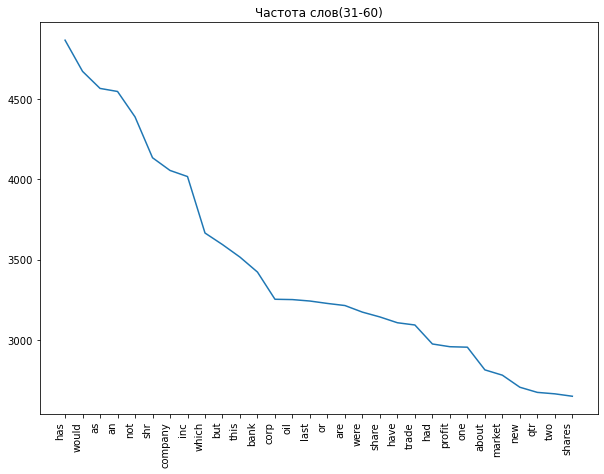

In [15]:
fig = plt.figure(figsize = (10, 8))
plt.title('Частота слов(31-60)')
plt.plot(df_text.Word[30:60],df_text.Kol[30:60])
fig.autofmt_xdate(rotation = 90)
fig.savefig('word2.png')

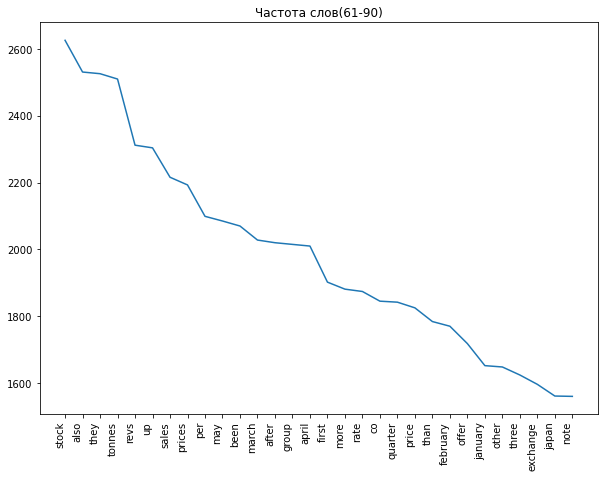

In [16]:
fig = plt.figure(figsize = (10, 8))
plt.title('Частота слов(61-90)')
plt.plot(df_text.Word[60:90],df_text.Kol[60:90])
fig.autofmt_xdate(rotation = 90)
fig.savefig('word3.png')

In [17]:
# c.Провести нормализацию (или лемматизацию, или стемминг) слов и повторить расчеты п. b)
import nltk
nltk.download('punkt')
df.text = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
# Удаление стоп-слов
df.text = df.text.apply(lambda lst: 
                        [word for word in lst if word not in stopwords.words('english')])
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
df.text = df.text.apply(
                    lambda lst:[lmtzr.lemmatize(word) for word in lst])
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Екатерина\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ids,categories,text
0,test/14826,['trade'],"[asian, exporter, fear, damage, u, japan, rift..."
1,test/14828,['grain'],"[china, daily, say, vermin, eat, pct, grain, s..."
2,test/14829,"['crude', 'nat-gas']","[japan, revise, long, term, energy, demand, do..."
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...","[thai, trade, deficit, widens, first, quarter,..."
4,test/14833,"['palm-oil', 'veg-oil']","[indonesia, see, cpo, price, rising, sharply, ..."
...,...,...,...
10783,training/999,"['interest', 'money-fx']","[uk, money, market, shortage, forecast, revise..."
10784,training/9992,['earn'],"[knight, ridder, inc, ltkrn, set, quarterly, q..."
10785,training/9993,['earn'],"[technitrol, inc, lttnl, set, quarterly, qtly,..."
10786,training/9994,['earn'],"[nationwide, cellular, service, inc, ltncel, t..."


In [18]:
t = vec_text.fit_transform(df.text.astype(str))
df_text2 = pd.DataFrame({"Word": np.array(vec_text.get_feature_names()), 
                         'Kol':np.asarray(t.sum(axis=0)).ravel()})
df_text2 = (df_text2.sort_values(by=['Kol'], ascending=False))
df_text2 = df_text2.reset_index(drop=True)
df_text2

,Word,Kol
0,said,25376
1,mln,18623
2,dlrs,12332
3,pct,9808
4,ct,8515
...,...,...
29740,lthbano,1
29741,lthbe,1
29742,lthboc,1
29743,lthboco,1


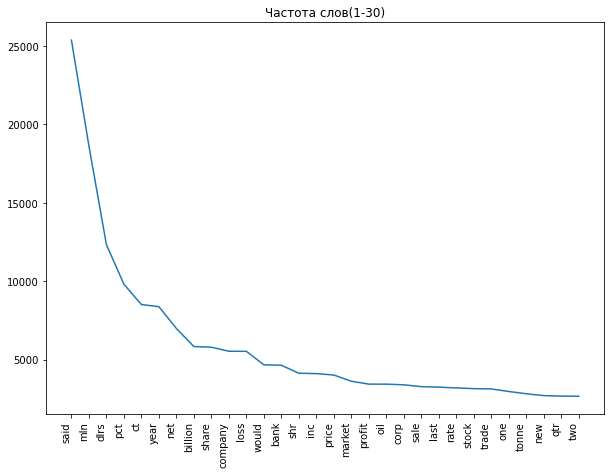

In [19]:
# Графики для 90 наиболее часто встречающихся слов после лемматизации и удаления стоп слов
fig = plt.figure(figsize = (10, 8))
plt.title('Частота слов(1-30)')
plt.plot(df_text2.Word[:30],df_text2.Kol[:30])
fig.autofmt_xdate(rotation = 90)
fig.savefig('word1.2.png')

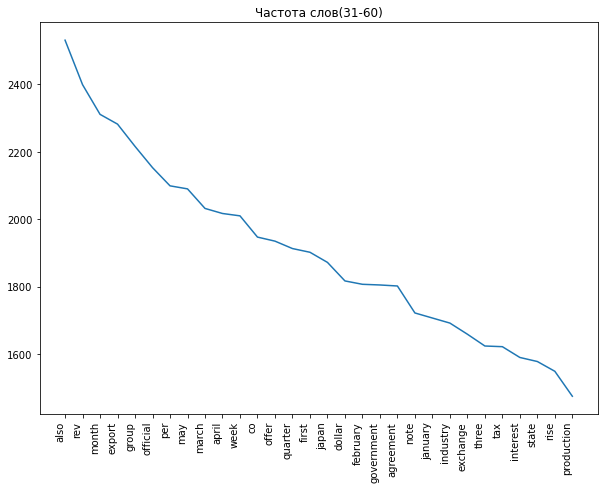

In [20]:
fig = plt.figure(figsize = (10, 8))
plt.title('Частота слов(31-60)')
plt.plot(df_text2.Word[30:60],df_text2.Kol[30:60])
fig.autofmt_xdate(rotation = 90)
fig.savefig('word2.2.png')

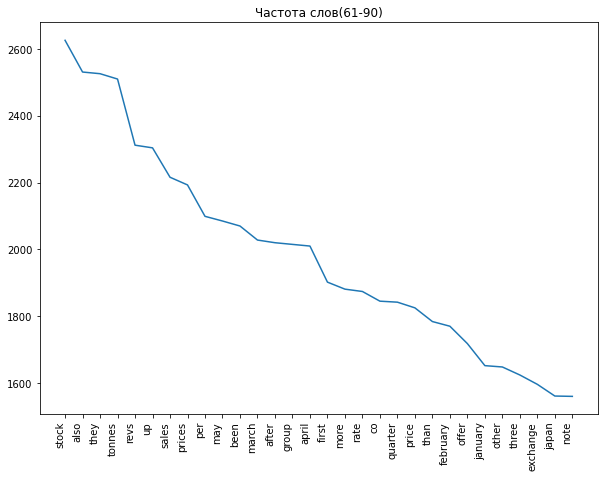

In [21]:
fig = plt.figure(figsize = (10, 8))
plt.title('Частота слов(61-90)')
plt.plot(df_text.Word[60:90],df_text.Kol[60:90])
fig.autofmt_xdate(rotation = 90)
fig.savefig('word3.png')

In [22]:
# d.Удалить из выборки слова, которые встречаются менее 3 раз.
df_text_drop = df_text2.query('Kol<3')
dw = list(df_text_drop.Word)
df_text_drop

,Word,Kol
13229,ltsmsi,2
13230,sturm,2
13231,derlan,2
13232,ltsmls,2
13233,ltum,2
...,...,...
29740,lthbano,1
29741,lthbe,1
29742,lthboc,1
29743,lthboco,1


In [23]:
df.text = df.text.apply(lambda x: [item for item in x if item not in dw])
df

,ids,categories,text
0,test/14826,['trade'],"[asian, exporter, fear, damage, u, japan, rift..."
1,test/14828,['grain'],"[china, daily, say, eat, pct, grain, stock, su..."
2,test/14829,"['crude', 'nat-gas']","[japan, revise, long, term, energy, demand, do..."
3,test/14832,"['corn', 'grain', 'rice', 'rubber', 'sugar', '...","[thai, trade, deficit, widens, first, quarter,..."
4,test/14833,"['palm-oil', 'veg-oil']","[indonesia, see, cpo, price, rising, sharply, ..."
...,...,...,...
10783,training/999,"['interest', 'money-fx']","[uk, money, market, shortage, forecast, revise..."
10784,training/9992,['earn'],"[knight, inc, set, quarterly, qtly, div, ct, v..."
10785,training/9993,['earn'],"[inc, set, quarterly, qtly, div, ct, v, ct, pr..."
10786,training/9994,['earn'],"[nationwide, cellular, service, inc, th, qtr, ..."


In [24]:
# e.Для каждого документа оставить единственный класс, который встречается в выборке чаще всего 
dff = df.copy(deep=True)
d = list(df_kl.Klass)
dff.categories = dff.categories.str.replace('[^a-z -]', '')
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
dff.categories = dff.categories.apply(tt.tokenize)
for key, value in dff.categories.iteritems():
    dff.loc[key,'categories'] = [v for v in d if v in value][0]
dff

,ids,categories,text
0,test/14826,trade,"[asian, exporter, fear, damage, u, japan, rift..."
1,test/14828,grain,"[china, daily, say, eat, pct, grain, stock, su..."
2,test/14829,crude,"[japan, revise, long, term, energy, demand, do..."
3,test/14832,grain,"[thai, trade, deficit, widens, first, quarter,..."
4,test/14833,veg-oil,"[indonesia, see, cpo, price, rising, sharply, ..."
...,...,...,...
10783,training/999,money-fx,"[uk, money, market, shortage, forecast, revise..."
10784,training/9992,earn,"[knight, inc, set, quarterly, qtly, div, ct, v..."
10785,training/9993,earn,"[inc, set, quarterly, qtly, div, ct, v, ct, pr..."
10786,training/9994,earn,"[nationwide, cellular, service, inc, th, qtr, ..."


In [25]:
dff.categories = dff.categories.str.replace('[-]', '0')
vec_cl2 = CountVectorizer()
classes2 = vec_cl2.fit_transform(dff.categories)
df_kl2 = pd.DataFrame({"Klass": np.array(vec_cl2.get_feature_names()), 
                       'Kol':np.asarray(classes2.sum(axis=0)).ravel()})
df_kl2 = (df_kl2.sort_values(by=['Kol'], ascending=False))
df_kl2 = df_kl2.reset_index(drop=True)
df_kl2.Klass = df_kl2.Klass.str.replace('[0]', '-')
df_kl2

,Klass,Kol
0,earn,3964
1,acq,2350
2,money-fx,716
3,grain,578
4,crude,539
...,...,...
61,rice,1
62,nzdlr,1
63,l-cattle,1
64,propane,1


In [26]:
df_kl2.Kol.sum()

10788

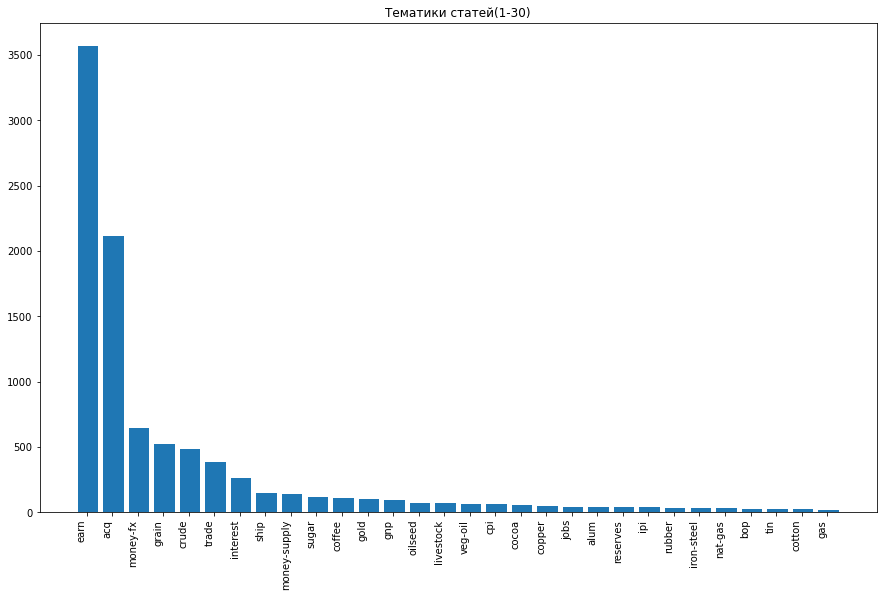

In [27]:
# f.Еще раз построить гистограммы распределения по классам
fig = plt.figure(figsize = (15, 10))
plt.title('Тематики статей(1-30)')
xs = range(len(df_kl2.Klass[:30]))
plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in df_kl2.Kol[:30]])
plt.xticks(xs, df_kl2.Klass[:30])
fig.autofmt_xdate(rotation = 90)
fig.savefig('tem1.2.png')

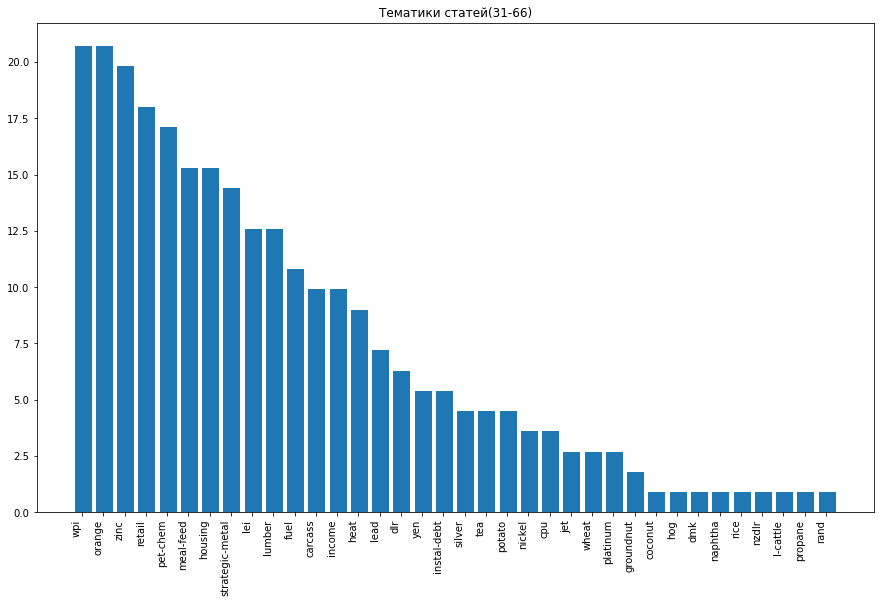

In [28]:
fig = plt.figure(figsize = (15, 10))
plt.title('Тематики статей(31-66)')
xs = range(len(df_kl2.Klass[30:]))
plt.bar([x + 0.05 for x in xs], [ d * 0.9 for d in df_kl2.Kol[30:]])
plt.xticks(xs, df_kl2.Klass[30:])
fig.autofmt_xdate(rotation = 90)
fig.savefig('tem2.2.png')

In [29]:
dff.categories = dff.categories.str.replace('[0]', '-')
dff.to_csv('p1_df.csv')
df_kl2.to_csv('p1_df_kl.csv')